In [ ]:
!pip install --upgrade setuptools pip
!pip install openslides

!apt update && apt install -y openslide-tools
!pip install openslide-python

Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (54.1.2)
     |████████████████████████████████| 1.5MB 5.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 9.3 MB 5.6 MB/s 
     |████████████████████████████████| 399 kB 54.9 MB/s 
     |████████████████████████████████| 151 kB 54.3 MB/s 
     |████████████████████████████████| 7.5 MB 54.5 MB/s 
     |████████████████████████████████| 911 kB 41.1 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 1.8 MB 59.0 MB/s 
     |████████████████████████████████| 77 kB 5.2 MB/s 
     |████████████████████████████████| 582 kB 42.8 MB/s 
     |████████████████████████████████| 79 kB 6.3 MB/s 
     |████████████████████████████████| 3.1 MB 61.0 MB/s 
     |████████████████████████████████| 74 kB 2.1 MB/s 
     |████████████████████████████████| 248 kB 44.0

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://ppa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from openslide import OpenSlide

In [ ]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
from math import sqrt

def distance(p1,p2):
  distance = sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2))
  return distance


In [ ]:
import xml.etree.ElementTree as ET
from math import floor,ceil
tree = ET.parse('drive/MyDrive/BioinfoImages/sqLabels/M-3.xml')
root = tree.getroot()
annotations = root[0]

coordinateList = []

for rectangle in annotations:
  coordinates = rectangle[0]
  positions = ["downLeft","downRight","topRight","topLeft"]
  rectangleCoordinates = {}
  
  for i,coordinate in enumerate(coordinates):
    X = float(coordinate.get('X').replace(",","."))
    Y = float(coordinate.get('Y').replace(",","."))

    '''Find the largest rectangle within the original rectangle
    so that the final coordinates will be integers 
    '''

    if positions[i].find("Left"):
      X = ceil(X)
    elif positions[i].find("Right"):
      X = floor(X)

    if positions[i].find("top"):
      Y = floor(Y)
    elif positions[i].find("down"):
      Y = ceil(Y)


    rectangleCoordinates[positions[i]] = {"XY":[X,Y]}
    
  coordinateList.append(rectangleCoordinates)

size = 128

rRegionList = []

for rectangle in coordinateList:
  height = distance(rectangle["topLeft"]["XY"],rectangle["downLeft"]["XY"])
  
  width = distance(rectangle["topLeft"]["XY"],rectangle["topRight"]["XY"])

  xiterations = floor(width/size) 
  yiterations = floor(height/size)
  xInitial = rectangle["topLeft"]["XY"][0]
  print(xInitial)
  yInitial = rectangle["topLeft"]["XY"][1]
  
  for i in range(xiterations):

    for j in range(yiterations):
      x = xInitial + size*i
      y = yInitial + size*j
      rRegionList.append((x,y))

22679
20219
18049
20309
9684
12309
13947
16810
13893
8430
15262
16733
10978


In [ ]:
image_path = "drive/MyDrive/BioinfoImages/rawImages/M-3.tiff"

image = OpenSlide(image_path)

for region in rRegionList:
  regionImg = image.read_region(region,0,(size,size))
  break

In [ ]:
type(regionImg)

PIL.Image.Image

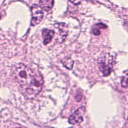

In [ ]:
from IPython.display import Image 
display(regionImg)